In [1]:
%%javascript
$(document).ready(() => {
    // Удаление данного блока кода с конечного результата.
    $('div.code_cell').first().css('display', 'none');

    // Включение автоматического переноса слов в параграфе.
    $('div.text_cell p').css('hyphens', 'auto');

    // Включение растягивания текста на всю доступную длину.
    $('div.text_cell p').css('text-align', 'justify');
});

<IPython.core.display.Javascript object>

<h3><b>Лабораторная работа №7: Метод главных компонент</b></h3>

<p lang="ru">Метод главных компонент — это технология многомерного статистического анализа, используемая для сокращения размерности пространства признаков с минимальной потерей полезной информации. С математической точки зрения метод главных компонент представляет собой ортогональное линейное преобразование, которое отображает данные из исходного пространства признаков в новое пространство меньшей размерности. При этом первая ось новой системы координат строится таким образом, чтобы дисперсия данных вдоль неё была максимальна. Вторая ось строится ортогонально первой так, чтобы дисперсия данных вдоль неё была максимальной из оставшихся возможных.</p>

In [2]:
%autosave 300

Autosaving every 300 seconds


In [3]:
import warnings

# Игнорирование некоторых оповещающих сообщений библиотек.
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
import numpy as np

In [5]:
# Импортирование функции для чтения MATLAB файлов.
from scipy.io import loadmat

In [6]:
# Импортирование библиотек для работы с графиками.
from matplotlib import pyplot
from mpl_toolkits import mplot3d
%matplotlib inline

In [7]:
# Установка начального значения для генератора случайных чисел.
# Данное действие требуется для воспроизведения результатов опыта.
np.random.seed(0)

<p lang="ru"><b>Пункт №1:&nbsp;</b>Загрузка первого предоставленного набора данных <tt>ex7data1.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит несколько координат точек, для которых необходимо выделить главные компоненты.</p>

In [8]:
data = loadmat('./datasets/ex7data1.mat')['X']

<p lang="ru"><b>Пункт №2:&nbsp;</b>Построение графика зависимости первой переменной от второй. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором.</p>

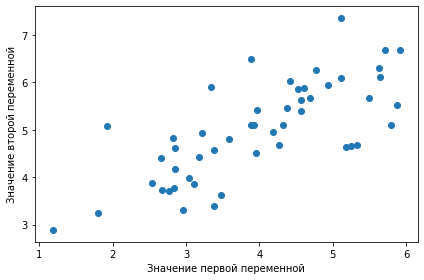

In [9]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(data[:, 0], data[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №3:&nbsp;</b>Вычисление ковариационной матрицы предоставленных данных. Ковариационная матрица в теории вероятностей — это матрица попарных ковариаций элементов одного или двух случайных векторов. Ковариационная матрица случайного вектора является многомерным аналогом дисперсии случайной величины для случайных векторов.</p>

In [10]:
def calc_cov(x):
    # Вычисление ковариационной матрицы данных.
    return 1 / x.shape[0] * x.T.dot(x)

<p lang="ru"><b>Пункт №4:&nbsp;</b>Вычисление координат собственных векторов, доступных для набора данных с помощью сингулярного разложения матрицы ковариации. Собственный вектор — понятие в линейной алгебре, определяемое для квадратной матрицы или произвольного линейного преобразования как вектор, умножение матрицы на который или применение к которому преобразования даёт некоторый коллинеарный вектор, а именно такой же вектор, умноженный на скалярное значение, называемое собственным числом матрицы или линейного преобразования.</p>

In [11]:
def calc_eig(x):
    # Вычисление координат собственных векторов.
    return np.linalg.svd(calc_cov(x))[:2]

<p lang="ru"><b>Пункт №5:&nbsp;</b>Построение полученных собственных векторов совместно с графиком зависимости первой переменной от второй. Данное действие необходимо для визуальной оценки корректности вычисленных собственных векторов для предоставленных данных.</p>

In [12]:
def normalize(x):
    # Вычисление среднего значения выборки.
    mean = np.mean(x, axis=0)

    # Произведение стандартной нормализации.
    x_norm = (x - mean) / x.std(axis=0, ddof=0)

    return x_norm, mean

In [13]:
# Нормализация признаков выборки.
data_norm, mean = normalize(data)

In [14]:
# Вычисление собственных векторов.
u, s = calc_eig(data_norm)

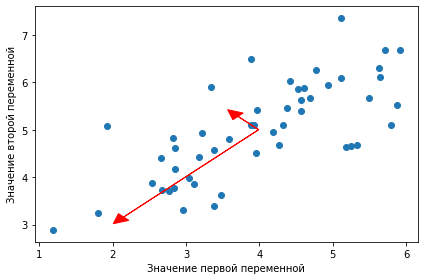

In [15]:
# Вычисление координат первого вектора.
y0 = 1.5 * s[0] * u[0, 0].T
y1 = 1.5 * s[0] * u[0, 1].T

# Вычисление координат второго вектора.
y2 = 1.5 * s[1] * u[1, 0].T
y3 = 1.5 * s[1] * u[1, 1].T

# Отрисовка направлений вычисленных собственных векторов.
pyplot.arrow(mean[0], mean[1], y0, y1, head_width=0.2, head_length=0.2, color='r')
pyplot.arrow(mean[0], mean[1], y2, y3, head_width=0.2, head_length=0.2, color='r')

# Построение точечной диаграммы разброса данных.
pyplot.scatter(data[:, 0], data[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №6:&nbsp;</b>Реализация функции проекции данных из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент. Данное действие подразумевает собой проекцию всех точек данных на плоскости, созданные собственными векторами этих данных. Проекция точки на плоскость — это точка пересечения перпендикуляра из точки на плоскость и самой плоскости.</p>

In [16]:
def reduce(x, u_vec, ndim=1):
    # Выбор собственных векторов для проекции.
    u_vec = u_vec[:, :ndim]

    # Создание контейнера для вычисления результата.
    out = np.zeros((x.shape[0], ndim))

    # Вычисление проекций точек данных на векторы.
    for i in range(x.shape[0]):
        for ii in range(ndim):
            out[i, ii] = x[i, :].dot(u_vec[:, ii])

    return out

In [17]:
# Проецирование значений в пространство меньшей размерности.
data_reduced = reduce(data_norm, u)

<p lang="ru"><b>Пункт №7:&nbsp;</b>Реализация функции вычисления обратного преобразования данных из пространства меньшей размерностью в пространство большей размерностью. Данное действие необходимо для восстановления оригинального числа значений пространств данных.</p>

In [18]:
def recover(x, u_vec, ndim=1):
    # Выбор собственных векторов для проекции.
    u_vec = u_vec[:, :ndim]

    # Создание контейнера для вычисления результата.
    out = np.zeros((x.shape[0], u_vec.shape[0]))

    # Восстановление точек данных с векторов.
    for i in range(x.shape[0]):
        out[i, :] = x[i, :].dot(u_vec.T)

    return out

In [19]:
# Восстановление значений из пространства меньшей размерности.
data_recovered = recover(data_reduced, u)

<p lang="ru"><b>Пункт №8:&nbsp;</b>Построение графика зависимости первой переменной от второй. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором. Помимо этого на графике отчетливо видна проекция точек в пространство меньшей размерности.</p>

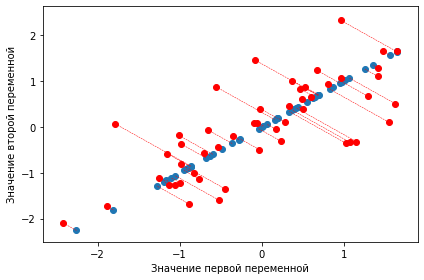

In [20]:
# Построение точечной диаграммы разброса проекции данных.
pyplot.scatter(data_recovered[:, 0], data_recovered[:, 1])

# Построение линий аппроксимации данных.
for norm, rec in zip(data_norm, data_recovered):
    pyplot.plot((norm[0], rec[0]), (norm[1], rec[1]), '--r', lw=0.5)

# Построение точечной диаграммы разброса данных.
pyplot.scatter(data_norm[:, 0], data_norm[:, 1], color='r', marker='o')

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

***

<p lang="ru"><b>Пункт №9:&nbsp;</b>Загрузка второго предоставленного набора данных <tt>ex7faces.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит несколько тысяч изображений в оттенках серого. Каждый пиксель представляет собой значение яркости.</p>

In [21]:
data = loadmat('./datasets/ex7faces.mat')['X']

<p lang="ru"><b>Пункт №10:&nbsp;</b>Визуализация нескольких изображений из исходного набора данных.</p>

In [22]:
def draw_faces(x):
    # Создание совместного полотна для графиков.
    figure, ax = pyplot.subplots(nrows=6, ncols=6, figsize=(8, 8))

    for i in range(0, 36, 6):
        for ii in range(6):
            ax[int(i/6), ii].imshow(x[i+ii].reshape(32, 32 , order='F'), cmap='gray')

            # Отключение координатных осей.
            ax[int(i/6), ii].axis('off')

    # Установка формы отображения.
    pyplot.gca().set_aspect('equal')
   
    # Настройка отображения.
    pyplot.tight_layout()

    # Отображение графика.
    pyplot.show()

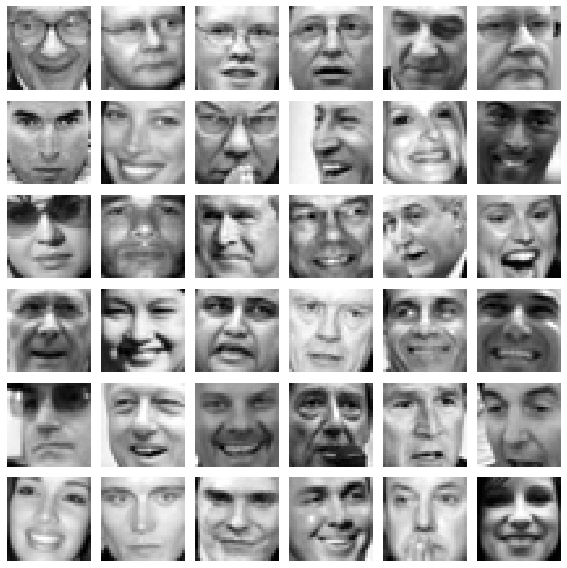

In [23]:
# Отрисовка оригинальных картинок.
draw_faces(data)

<p lang="ru"><b>Пункт №11:&nbsp;</b>Визуализация 36-ти и 100-а главных компонент с наибольшей дисперсией в предоставленном наборе данных. Данное действие необходимо для визуальной оценки корректности работы метода главных компонент. Помимо этого можно увидеть главные компоненты лица на изображении, а также сравнить значения потерь при понижении размерности данных.</p>

In [24]:
# Нормализация признаков выборки.
data_norm, mean = normalize(data)

In [25]:
# Вычисление собственных векторов.
u, s = calc_eig(data_norm)

In [26]:
# Количество пространств для проекции.
k_value = 36

# Выбор нескольких собственных векторов.
u_reduced = u[:, :k_value].T

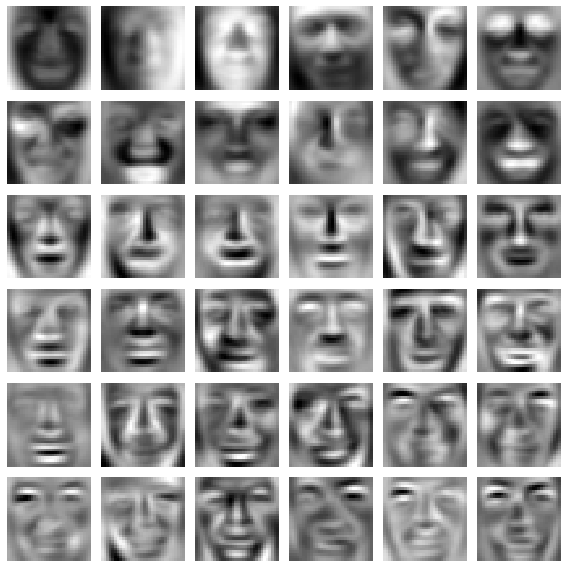

In [27]:
# Отрисовка первых 36-ти главных компонент данных.
draw_faces(u_reduced)

In [28]:
# Количество пространств для проекции.
k_value = 100

# Проецирование значений в пространство меньшей размерности.
data_reduced = reduce(data_norm, u, k_value)

# Восстановление значений из пространства меньшей размерности.
data_recovered = recover(data_reduced, u, k_value)

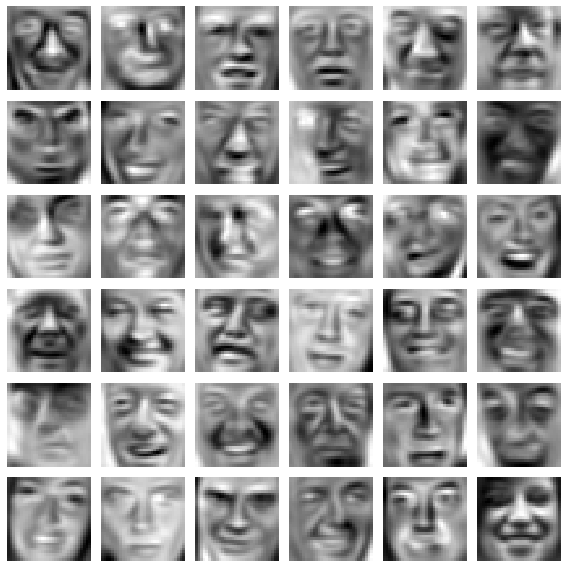

In [29]:
# Отрисовка картинок после проецирования в 100-мерное пространство.
draw_faces(data_recovered)

***

<p lang="ru"><b>Пункт №12:&nbsp;</b>Загрузка третьего предоставленного набора данных <tt>img_small.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит одно изображение в оттенках серого. Каждый пиксель представляет собой значение яркости.</p>

In [30]:
data = loadmat('./datasets/img_small.mat')['A']

<p lang="ru"><b>Пункт №13:&nbsp;</b>Применение метода главных компонент к загруженному набору данных и построение результата в двухмерном и трехмерном пространстве. Данное действие необходимо для визуальной демонстрации работы метода главных компонент.</p>

In [31]:
def prepare_image(img):
    # Преобразование тензора изображения в 2D матрицу.
    return np.reshape(img / 255.0, newshape=(-1, 3))

In [32]:
# Подготовка изображения.
img = prepare_image(data)

In [33]:
# Количество пространств для проекции.
k_value = 2

# Нормализация признаков выборки.
data_norm, mean = normalize(img)

# Вычисление собственных векторов.
u, s = calc_eig(data_norm)

In [34]:
# Проецирование значений в пространство меньшей размерности.
data_reduced = reduce(data_norm, u, k_value)

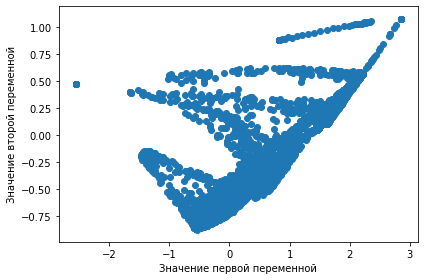

In [35]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(data_reduced[:, 0], data_reduced[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Значение первой переменной')
pyplot.ylabel('Значение второй переменной')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

In [36]:
# Количество пространств для проекции.
k_value = 3

# Проецирование значений в пространство меньшей размерности.
data_reduced = reduce(data_norm, u, k_value)

In [37]:
x = data_reduced[:, 0]
y = data_reduced[:, 1]
z = data_reduced[:, 2]

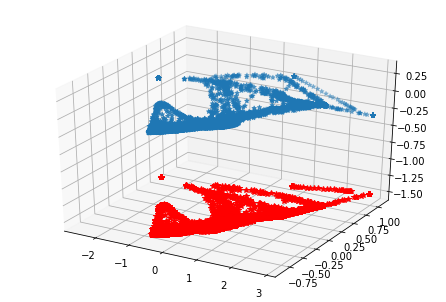

In [38]:
# Построение трехмерного графика проекции изображения в 3D.
ax = mplot3d.Axes3D(pyplot.figure())
ax.scatter(x, y, z, marker='*')

# Построение трехмерного графика проекции изображения в 2D.
ax.plot(x, y, '*r', zdir='z', zs=-1.5)

# Отображение графика.
pyplot.show()